In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='rainbow')

In [4]:
close = pd.read_csv('close.csv',parse_dates=['Date'],index_col=['Date'])

In [5]:
close.head()

,AAPL,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2009-12-31,7.526072,54.130001,32.25,130.899994,28.500000,30.480000
2010-01-04,7.643214,56.180000,32.07,132.449997,28.520000,30.950001
2010-01-05,7.656428,58.020000,31.99,130.850006,28.174999,30.959999
2010-01-06,7.534643,59.779999,31.82,130.000000,28.165001,30.770000
2010-01-07,7.520714,62.200001,31.83,129.550003,28.094999,30.450001


In [6]:
 ### working with Apple( AAPL)

In [7]:
aapl = close['AAPL'].copy().to_frame()

In [8]:
aapl.head()

,AAPL
Date,
2009-12-31,7.526072
2010-01-04,7.643214
2010-01-05,7.656428
2010-01-06,7.534643
2010-01-07,7.520714


In [9]:
#calculating price increase rate from last days

In [10]:
aapl.shift(periods=1)

,AAPL
Date,
2009-12-31,NaN
2010-01-04,7.526072
2010-01-05,7.643214
2010-01-06,7.656428
2010-01-07,7.534643
...,...
2019-01-30,38.669998
2019-01-31,41.312500
2019-02-01,41.610001


In [11]:
 aapl['lag1'] = aapl.shift(periods=1)

In [12]:
aapl.head()

,AAPL,lag1
Date,,
2009-12-31,7.526072,NaN
2010-01-04,7.643214,7.526072
2010-01-05,7.656428,7.643214
2010-01-06,7.534643,7.656428
2010-01-07,7.520714,7.534643


In [13]:
aapl['AAPL'].sub(aapl['lag1']) #increase and decrease price

Date
2009-12-31         NaN
2010-01-04    0.117143
2010-01-05    0.013214
2010-01-06   -0.121786
2010-01-07   -0.013928
                ...   
2019-01-30    2.642502
2019-01-31    0.297501
2019-02-01    0.020000
2019-02-04    1.182499
2019-02-05    0.732498
Length: 2289, dtype: float64

In [14]:
aapl['Diff'] = aapl['AAPL'].sub(aapl['lag1'])

In [15]:
aapl.head()

,AAPL,lag1,Diff
Date,,,
2009-12-31,7.526072,NaN,NaN
2010-01-04,7.643214,7.526072,0.117143
2010-01-05,7.656428,7.643214,0.013214
2010-01-06,7.534643,7.656428,-0.121786
2010-01-07,7.520714,7.534643,-0.013928


In [16]:
#calulate the percentage change

In [17]:
aapl['AAPL'].div(aapl['lag1']).sub(1).mul(100)

Date
2009-12-31         NaN
2010-01-04    1.556492
2010-01-05    0.172887
2010-01-06   -1.590633
2010-01-07   -0.184858
                ...   
2019-01-30    6.833468
2019-01-31    0.720123
2019-02-01    0.048066
2019-02-04    2.840497
2019-02-05    1.710945
Length: 2289, dtype: float64

In [18]:
aapl['pct_change'] = aapl['AAPL'].div(aapl['lag1']).sub(1).mul(100)

In [19]:
aapl.head()

,AAPL,lag1,Diff,pct_change
Date,,,,
2009-12-31,7.526072,NaN,NaN,NaN
2010-01-04,7.643214,7.526072,0.117143,1.556492
2010-01-05,7.656428,7.643214,0.013214,0.172887
2010-01-06,7.534643,7.656428,-0.121786,-1.590633
2010-01-07,7.520714,7.534643,-0.013928,-0.184858


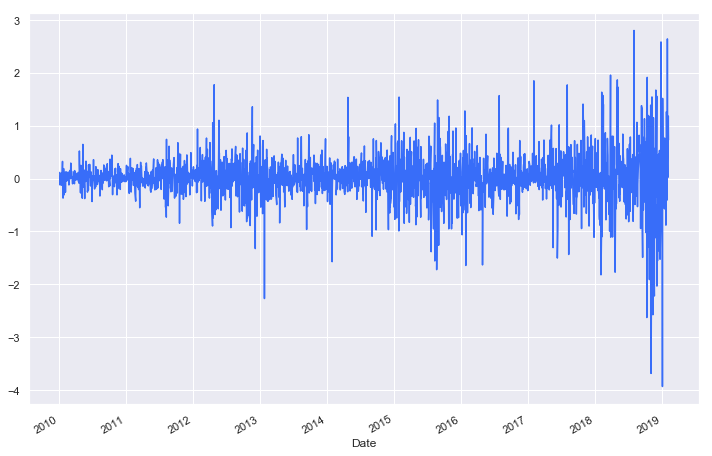

In [22]:
aapl['Diff'].plot(figsize=(12,8))
plt.show()

In [23]:
#############
# diff()  #pct_change()

In [25]:
aapl['AAPL'].diff(periods=1)

Date
2009-12-31         NaN
2010-01-04    0.117143
2010-01-05    0.013214
2010-01-06   -0.121786
2010-01-07   -0.013928
                ...   
2019-01-30    2.642502
2019-01-31    0.297501
2019-02-01    0.020000
2019-02-04    1.182499
2019-02-05    0.732498
Name: AAPL, Length: 2289, dtype: float64

In [26]:
aapl['Diff_2'] = aapl['AAPL'].diff(periods=1)

In [27]:
aapl.head()

,AAPL,lag1,Diff,pct_change,Diff_2
Date,,,,,
2009-12-31,7.526072,NaN,NaN,NaN,NaN
2010-01-04,7.643214,7.526072,0.117143,1.556492,0.117143
2010-01-05,7.656428,7.643214,0.013214,0.172887,0.013214
2010-01-06,7.534643,7.656428,-0.121786,-1.590633,-0.121786
2010-01-07,7.520714,7.534643,-0.013928,-0.184858,-0.013928


In [28]:
aapl['Diff'].equals(aapl['Diff_2'])

True

In [29]:
##

In [31]:
aapl['pct_change2'] = aapl['AAPL'].pct_change(periods=1).mul(100)

In [32]:
aapl.head()

,AAPL,lag1,Diff,pct_change,Diff_2,pct_change2
Date,,,,,,
2009-12-31,7.526072,NaN,NaN,NaN,NaN,NaN
2010-01-04,7.643214,7.526072,0.117143,1.556492,0.117143,1.556492
2010-01-05,7.656428,7.643214,0.013214,0.172887,0.013214,0.172887
2010-01-06,7.534643,7.656428,-0.121786,-1.590633,-0.121786,-1.590633
2010-01-07,7.520714,7.534643,-0.013928,-0.184858,-0.013928,-0.184858


In [33]:
aapl['pct_change'].equals(aapl['pct_change2'])

True

In [34]:
########################################################

In [35]:
#resample

In [39]:
apple_month =aapl['AAPL'].resample('M')
apple_Bmonth = aapl['AAPL'].resample('BM')

In [40]:
apple_month.last()

Date
2009-12-31     7.526072
2010-01-31     6.859286
2010-02-28     7.307857
2010-03-31     8.392858
2010-04-30     9.324643
                ...    
2018-10-31    54.715000
2018-11-30    44.645000
2018-12-31    39.435001
2019-01-31    41.610001
2019-02-28    43.544998
Freq: M, Name: AAPL, Length: 111, dtype: float64

In [41]:
apple_Bmonth.last()

Date
2009-12-31     7.526072
2010-01-29     6.859286
2010-02-26     7.307857
2010-03-31     8.392858
2010-04-30     9.324643
                ...    
2018-10-31    54.715000
2018-11-30    44.645000
2018-12-31    39.435001
2019-01-31    41.610001
2019-02-28    43.544998
Freq: BM, Name: AAPL, Length: 111, dtype: float64

In [42]:
apple_Bmonth.last().pct_change(periods=1).mul(100)

Date
2009-12-31          NaN
2010-01-29    -8.859678
2010-02-26     6.539620
2010-03-31    14.847041
2010-04-30    11.102126
                ...    
2018-10-31    -3.047756
2018-11-30   -18.404459
2018-12-31   -11.669838
2019-01-31     5.515403
2019-02-28     4.650319
Freq: BM, Name: AAPL, Length: 111, dtype: float64